In [3]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

In [4]:

dir_path = '3d_scan'

directory = []

for file_path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, file_path)):
        directory.append(file_path)
print(directory)

['1_18.csv', '2_18.csv', '3_18.csv', '4_18.csv', '5_18.csv', '6_18.csv', '7_18.csv']


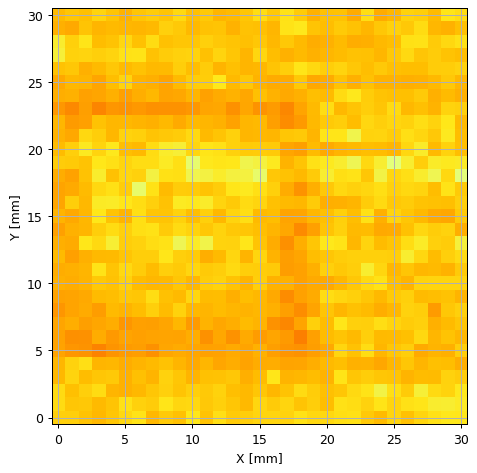

In [5]:

from matplotlib import pyplot as plt
import numpy as np


data = pd.read_csv(dir_path + "/" +directory[-1],index_col=0)
data = data.astype('complex')
data = data.to_numpy()

local_z = np.array(data.real, copy=True)

fig = plt.figure(figsize=(6, 6), dpi=90)
fig.tight_layout()
axes = fig.add_subplot(111)
axes.set_xlabel("X [mm]")
axes.set_ylabel("Y [mm]")
axes.grid()


# if not np.isnan(local_z).all():
#     z_mean = np.mean(local_z[~np.isnan(local_z)])
#     local_z[np.isnan(local_z)] = z_mean

im = axes.imshow(
    local_z,
    cmap="Wistia",
    vmin=np.min(local_z),
    vmax=np.max(local_z),
    # extent=[z.x_min, z.x_max, z.y_min, z.y_max],
    interpolation="none",
    origin="lower",
) 

# axes.set_xlim([z.x_min, z.x_max])
# axes.set_ylim([z.y_min, z.y_max])

plt.show()

# 3D scan

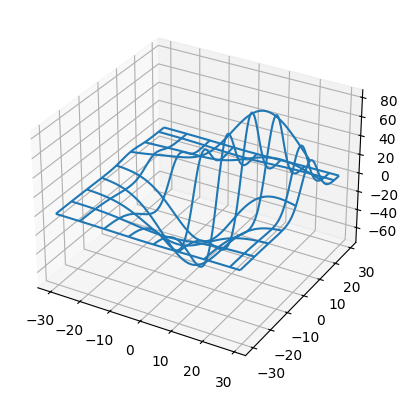

In [6]:


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.08)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

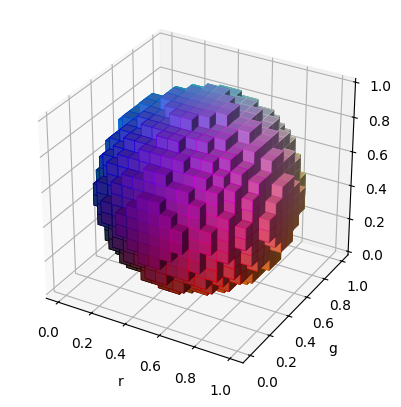

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
ax.set_aspect('equal')

plt.show()